In [ ]:
# -------------------------------------------
# 1. Import Required Libraries
# -------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Set seaborn style
sns.set(style='whitegrid')

In [ ]:
# -------------------------------------------
# 2. Load and Explore the Digits Dataset
# -------------------------------------------

# Load built-in digits dataset (images of handwritten digits 0–9)
digits = load_digits()
X = digits.data       # Features (64 pixel values)
y = digits.target     # Labels (digits 0 to 9)

In [ ]:
# Print basic information
print(f"Feature shape: {X.shape}")
print(f"Target classes: {np.unique(y)}")

Feature shape: (1797, 64)
Target classes: [0 1 2 3 4 5 6 7 8 9]


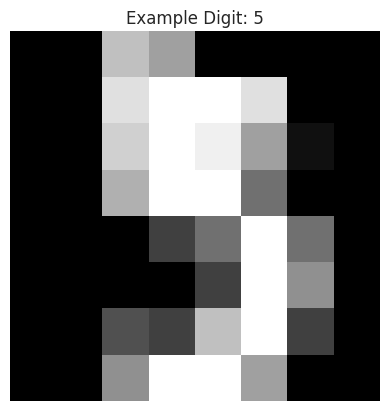

In [ ]:
# Visualize the first image to understand input data
plt.imshow(digits.images[5], cmap='gray')
plt.title(f"Example Digit: {digits.target[5]}")
plt.axis('off')
plt.show()

In [ ]:
# -------------------------------------------
# 3. Preprocessing: Feature Scaling
# -------------------------------------------

# Standardize features to have mean=0 and std=1
# This is especially important for SVM and KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# -------------------------------------------
# 4. Split Data into Training and Testing Sets
# -------------------------------------------

# Use 80% of data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [ ]:
# -------------------------------------------
# 5. Define Multiple Models for Comparison
# -------------------------------------------

# We will evaluate five different classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM (Linear Kernel)": SVC(kernel='linear')
}

In [ ]:
# -------------------------------------------
# 4. Define Evaluation Function
# -------------------------------------------

def evaluate_model(model, model_name):
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print Metrics
    print(f"\n🔍 {model_name} Evaluation:")
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1 Score     : {f1:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=digits.target_names,
                yticklabels=digits.target_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Return metrics for final comparison
    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }


🔍 Logistic Regression Evaluation:
Accuracy     : 0.9722
Precision    : 0.9737
Recall       : 0.9744
F1 Score     : 0.9740

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



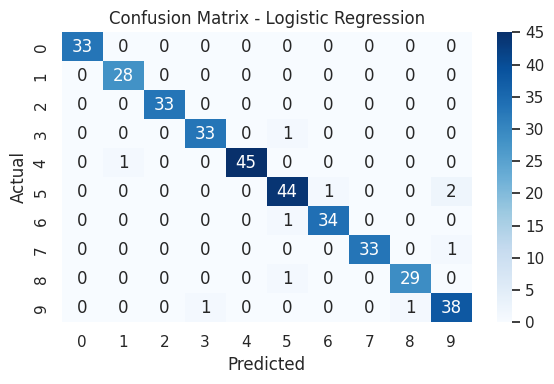

In [ ]:
# -------------------------------------------
# 5. Train and Evaluate Models One-by-One
# -------------------------------------------

comparison_results = []

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000)
result = evaluate_model(lr, "Logistic Regression")
comparison_results.append(result)


🔍 K-Nearest Neighbors Evaluation:
Accuracy     : 0.9750
Precision    : 0.9765
Recall       : 0.9769
F1 Score     : 0.9765

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      0.94      0.97        34
           8       0.97      1.00      0.98        30
           9       0.95      0.90      0.92        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



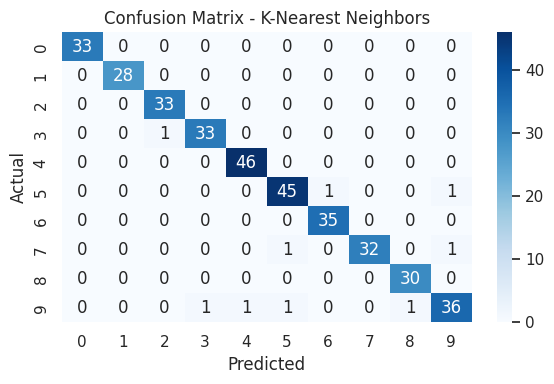

In [ ]:
# 2. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
result = evaluate_model(knn, "K-Nearest Neighbors")
comparison_results.append(result)


🔍 Naive Bayes Evaluation:
Accuracy     : 0.7667
Precision    : 0.8170
Recall       : 0.7705
F1 Score     : 0.7599

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.75      0.75      0.75        28
           2       0.86      0.36      0.51        33
           3       0.93      0.76      0.84        34
           4       1.00      0.52      0.69        46
           5       0.81      0.94      0.87        47
           6       0.88      1.00      0.93        35
           7       0.52      0.97      0.68        34
           8       0.49      0.83      0.62        30
           9       0.96      0.62      0.76        40

    accuracy                           0.77       360
   macro avg       0.82      0.77      0.76       360
weighted avg       0.83      0.77      0.76       360



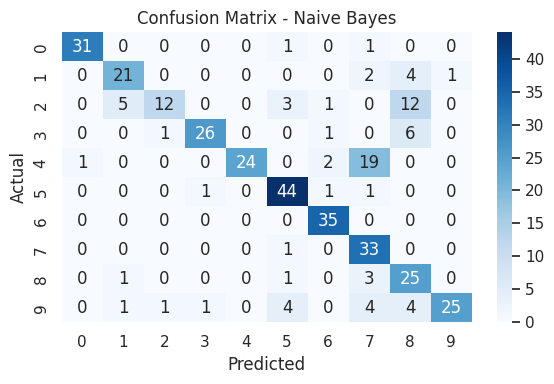

In [ ]:
# 3. Naive Bayes
nb = GaussianNB()
result = evaluate_model(nb, "Naive Bayes")
comparison_results.append(result)


🔍 Decision Tree Evaluation:
Accuracy     : 0.8417
Precision    : 0.8465
Recall       : 0.8365
F1 Score     : 0.8395

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.85      0.79      0.81        28
           2       0.86      0.76      0.81        33
           3       0.76      0.85      0.81        34
           4       0.81      0.91      0.86        46
           5       0.91      0.85      0.88        47
           6       1.00      0.91      0.96        35
           7       0.82      0.91      0.86        34
           8       0.75      0.70      0.72        30
           9       0.74      0.80      0.77        40

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



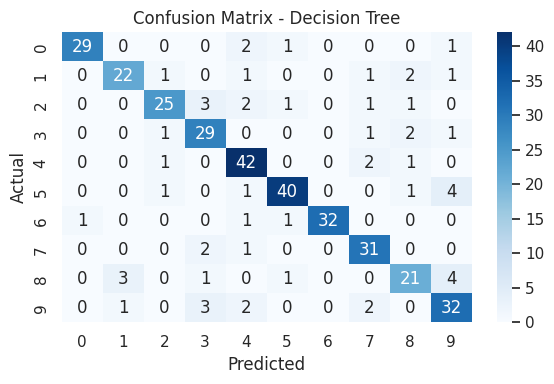

In [ ]:
# 4. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
result = evaluate_model(dt, "Decision Tree")
comparison_results.append(result)


🔍 SVM (Linear Kernel) Evaluation:
Accuracy     : 0.9750
Precision    : 0.9753
Recall       : 0.9753
F1 Score     : 0.9751

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



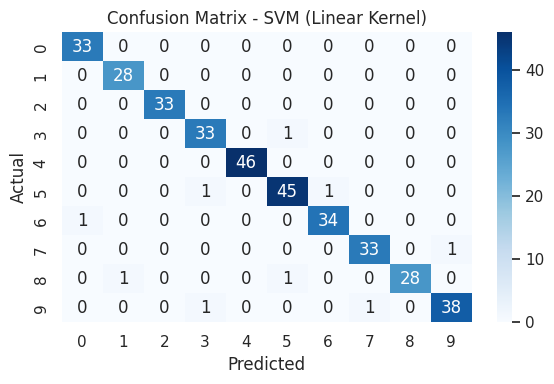

In [ ]:
# 5. Support Vector Machine
svm = SVC(kernel='linear')
result = evaluate_model(svm, "SVM (Linear Kernel)")
comparison_results.append(result)


📊 Final Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
1  K-Nearest Neighbors  0.975000   0.976468  0.976921  0.976465
4  SVM (Linear Kernel)  0.975000   0.975279  0.975339  0.975106
0  Logistic Regression  0.972222   0.973720  0.974370  0.973967
3        Decision Tree  0.841667   0.846481  0.836518  0.839528
2          Naive Bayes  0.766667   0.816982  0.770457  0.759880


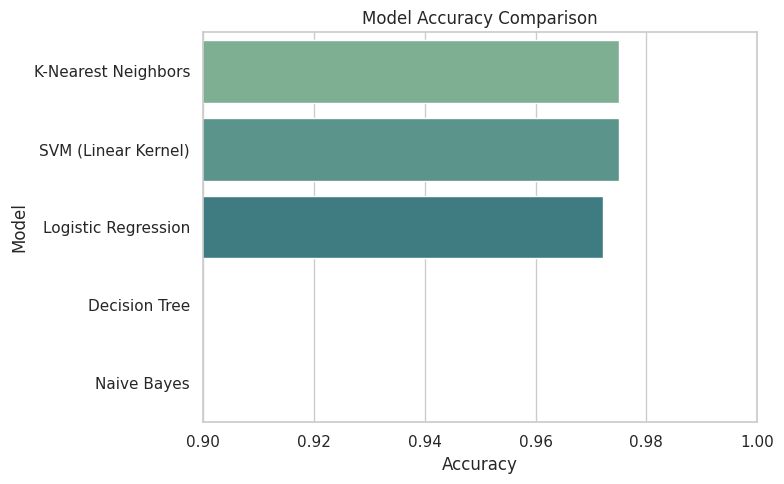

In [ ]:
# -------------------------------------------
# 6. Final Model Comparison Table
# -------------------------------------------

results_df = pd.DataFrame(comparison_results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("\n📊 Final Model Comparison:")
print(results_df)

# Plot Accuracy
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x="Accuracy", y="Model", hue="Model", palette="crest", legend=False)
plt.title("Model Accuracy Comparison")
plt.xlim(0.9, 1.0)
plt.tight_layout()
plt.show()